In [1]:
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("ips_dataset.csv", index_col = False)
df.head()

,Date & Time,Source IP,Destination IP,Source MAC,Destination MAC,Protocol,Flags,Src Port,Dst Port,Length,Packet
0,27-02-2020 11:34,192.168.0.50,192.168.0.20,40:f2:e9:9d:44:6b,00:90:e8:5e:d1:66,TCP,AP,60394,502,64,1
1,27-02-2020 11:34,192.168.0.20,192.168.0.50,00:90:e8:5e:d1:66,40:f2:e9:9d:44:6b,TCP,A,502,60394,40,1
2,27-02-2020 11:34,192.168.0.50,192.168.0.20,40:f2:e9:9d:44:6b,00:90:e8:5e:d1:66,TCP,AP,60394,502,52,1
3,27-02-2020 11:34,192.168.0.21,192.168.0.5,20:47:47:87:d4:96,00:1d:9c:a1:89:a4,TCP,S,59170,20000,48,1
4,27-02-2020 11:34,192.168.0.21,192.168.0.5,20:47:47:87:d4:96,00:1d:9c:a1:89:a4,TCP,A,59170,20000,40,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105150 entries, 0 to 105149
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Date & Time      105150 non-null  object
 1   Source IP        105150 non-null  object
 2   Destination IP   105150 non-null  object
 3   Source MAC       105150 non-null  object
 4   Destination MAC  105150 non-null  object
 5   Protocol         105150 non-null  object
 6   Flags            105150 non-null  object
 7   Src Port         105150 non-null  int64 
 8   Dst Port         105150 non-null  int64 
 9   Length           105150 non-null  int64 
 10  Packet           105150 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 8.8+ MB


In [4]:
df.isnull().sum()

Date & Time        0
Source IP          0
Destination IP     0
Source MAC         0
Destination MAC    0
Protocol           0
Flags              0
Src Port           0
Dst Port           0
Length             0
Packet             0
dtype: int64

In [5]:
df["Source IP"].unique()

array(['192.168.0.50', '192.168.0.20', '192.168.0.21', '192.168.0.5',
       '192.168.0.2', '192.168.0.122', '192.168.0.22', '192.168.0.204',
       '192.168.0.31', '192.168.0.35', '192.168.0.200', '192.168.0.175',
       '192.168.0.45'], dtype=object)

In [6]:
df["Protocol"].unique()

array(['TCP', 'Modbus', 'DNP3', 'ICMP', 'UDP'], dtype=object)

In [7]:
#df["Src Port"].unique()

In [8]:
df["Flags"].unique()

array(['AP', 'A', 'S', '0', 'AR', 'AS', 'ASF', 'SEC', 'AF', 'R', 'APF',
       'UPSF', 'UPF'], dtype=object)

In [9]:
df = df.sample(frac = 1).reset_index(drop=True)
df.head()

,Date & Time,Source IP,Destination IP,Source MAC,Destination MAC,Protocol,Flags,Src Port,Dst Port,Length,Packet
0,27-02-2020 11:34,192.168.0.21,192.168.0.5,20:47:47:87:d4:96,00:1d:9c:a1:89:a4,DNP3,AP,48701,20000,64,1
1,27-02-2020 11:42,192.168.0.22,192.168.0.20,08:00:27:e6:e5:59,00:90:e8:5e:d1:66,ICMP,0,0,0,60,1
2,27-02-2020 12:09,192.168.0.20,192.168.0.50,00:90:e8:5e:d1:66,40:f2:e9:9d:44:6b,Modbus,AP,502,57352,51,1
3,28-02-2020 14:41,192.168.0.21,192.168.0.20,20:47:47:87:d4:96,00:90:e8:5e:d1:66,TCP,A,47502,502,40,1
4,28-02-2020 14:45,192.168.0.21,192.168.0.20,20:47:47:87:d4:96,00:90:e8:5e:d1:66,Modbus,AP,48648,502,52,1


In [10]:
df.columns

Index(['Date & Time', 'Source IP', 'Destination IP', 'Source MAC',
       'Destination MAC', 'Protocol', 'Flags', 'Src Port', 'Dst Port',
       'Length', 'Packet'],
      dtype='object')

In [11]:
X = df[['Source IP', 'Destination IP', 'Source MAC', 'Destination MAC', 'Protocol', 'Flags', 'Src Port', 'Dst Port',
       'Length']].values
X

array([['192.168.0.21', '192.168.0.5', '20:47:47:87:d4:96', ..., 48701,
        20000, 64],
       ['192.168.0.22', '192.168.0.20', '08:00:27:e6:e5:59', ..., 0, 0,
        60],
       ['192.168.0.20', '192.168.0.50', '00:90:e8:5e:d1:66', ..., 502,
        57352, 51],
       ...,
       ['192.168.0.20', '192.168.0.50', '00:90:e8:5e:d1:66', ..., 502,
        62332, 51],
       ['192.168.0.200', '192.168.0.50', 'b8:ae:ed:b0:c1:a5', ..., 52734,
        7070, 302],
       ['192.168.0.175', '192.168.0.122', '00:11:22:33:44:55', ...,
        53370, 80, 265]], dtype=object)

In [12]:
y = df["Packet"].values
y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [13]:
ce_bin = ce.BinaryEncoder(return_df=False)
enc_bin = ce_bin.fit(X)

In [14]:
X = enc_bin.transform(X)
X

array([[    0,     0,     0, ..., 48701, 20000,    64],
       [    0,     0,     0, ...,     0,     0,    60],
       [    0,     0,     0, ...,   502, 57352,    51],
       ...,
       [    0,     0,     0, ...,   502, 62332,    51],
       [    0,     1,     0, ..., 52734,  7070,   302],
       [    0,     0,     1, ..., 53370,    80,   265]], dtype=int64)

In [15]:
X.shape

(105150, 39)

In [16]:
X[0]

array([    0,     0,     0,     0,     1,     0,     0,     0,     0,
           1,     0,     0,     0,     0,     0,     0,     0,     1,
           0,     0,     0,     0,     0,     0,     0,     0,     1,
           0,     0,     0,     1,     0,     0,     0,     0,     1,
       48701, 20000,    64], dtype=int64)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
import random
random.seed(1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_enc = sc.fit(X_train)
X_train = sc_enc.transform(X_train)
X_test = sc_enc.transform(X_test)

In [21]:
X_train.shape

(73605, 39)

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()

Using TensorFlow backend.


In [23]:
classifier.add(Dense(input_dim = 39, output_dim = 20, init= "uniform", activation = "relu"))
classifier.add(Dense(output_dim = 20, init= "uniform", activation = "relu"))
classifier.add(Dense(output_dim = 20, init= "uniform", activation = "relu"))
classifier.add(Dense(output_dim = 1, init= "uniform", activation = "sigmoid"))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=39, activation="relu", units=20, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [24]:
from keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor= 'val_loss', mode='min', verbose=1, patience = 5)

In [26]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [27]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 20, validation_data = (X_test, y_test), callbacks=[early_stop] )

Train on 73605 samples, validate on 31545 samples
Epoch 1/20
73605/73605 [==============================] - 17s 227us/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0071 - val_accuracy: 0.9986
Epoch 2/20
73605/73605 [==============================] - 13s 176us/step - loss: 0.0061 - accuracy: 0.9988 - val_loss: 0.0065 - val_accuracy: 0.9987
Epoch 3/20
73605/73605 [==============================] - 14s 191us/step - loss: 0.0057 - accuracy: 0.9989 - val_loss: 0.0059 - val_accuracy: 0.9987
Epoch 4/20
73605/73605 [==============================] - 19s 261us/step - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.0069 - val_accuracy: 0.9987
Epoch 5/20
73605/73605 [==============================] - 16s 217us/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.0065 - val_accuracy: 0.9987
Epoch 6/20
73605/73605 [==============================] - 16s 214us/step - loss: 0.0062 - accuracy: 0.9988 - val_loss: 0.0058 - val_accuracy: 0.9987
Epoch 7/20
73605/73605 [==============================] 

In [28]:
y_pred = classifier.predict(X_test)
y_pred

array([[0.99999785],
       [1.        ],
       [0.        ],
       ...,
       [0.99999917],
       [0.        ],
       [0.        ]], dtype=float32)

In [29]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))

[[14674    40]
 [    0 16831]]


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14714
           1       1.00      1.00      1.00     16831

    accuracy                           1.00     31545
   macro avg       1.00      1.00      1.00     31545
weighted avg       1.00      1.00      1.00     31545



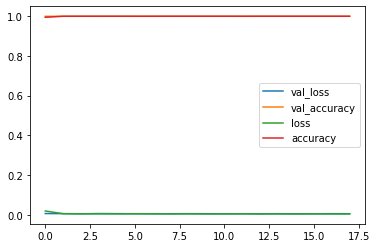

In [32]:
losses= pd.DataFrame(classifier.history.history)
losses.plot()

In [2]:
import sklearn
sklearn.__version__

'0.22.1'

In [3]:
import tensorflow as tf
tf.__version__

'2.0.0'